In [1]:
!pip install kaggle
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tensorflow
!pip install numpy scipy scikit-learn


In [5]:

!kaggle competitions download -c digit-recognizer


  0%|          | 0.00/15.3M [00:00<?, ?B/s]
  7%|6         | 1.00M/15.3M [00:00<00:08, 1.76MB/s]
 13%|#3        | 2.00M/15.3M [00:00<00:04, 3.44MB/s]
 26%|##6       | 4.00M/15.3M [00:00<00:01, 6.10MB/s]
 39%|###9      | 6.00M/15.3M [00:01<00:01, 7.75MB/s]
 52%|#####2    | 8.00M/15.3M [00:01<00:00, 8.84MB/s]
 65%|######5   | 10.0M/15.3M [00:01<00:00, 9.08MB/s]
 78%|#######8  | 12.0M/15.3M [00:01<00:00, 9.71MB/s]
 91%|#########1| 14.0M/15.3M [00:01<00:00, 10.2MB/s]
100%|##########| 15.3M/15.3M [00:01<00:00, 10.4MB/s]
100%|##########| 15.3M/15.3M [00:01<00:00, 8.14MB/s]


In [11]:
from zipfile import ZipFile

zf = ZipFile(r'C:\Users\PARAM M. SURELIYA\PycharmProjects\digit recognizer\digit-recognizer.zip')
zf.extractall(r'C:\Users\PARAM M. SURELIYA\PycharmProjects\digit recognizer')
zf.close()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.python import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x_test = test
x = train.drop(columns=['label'])
y = train['label']
print(x_test)
print(y)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [5]:
# Encode labels
print(y)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y)
y_train = to_categorical(y_train)
print(y_train)
print(y_train.shape)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(42000, 10)


In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/100
132/132 [==============================] - 19s 134ms/step - loss: 2.9393 - accuracy: 0.7102 - val_loss: 0.3094 - val_accuracy: 0.9086
Epoch 2/100
132/132 [==============================] - 18s 134ms/step - loss: 0.2356 - accuracy: 0.9313 - val_loss: 0.1830 - val_accuracy: 0.9448
Epoch 3/100
132/132 [==============================] - 17s 132ms/step - loss: 0.1454 - accuracy: 0.9564 - val_loss: 0.1344 - val_accuracy: 0.9582
Epoch 4/100
132/132 [==============================] - 16s 123ms/step - loss: 0.1078 - accuracy: 0.9671 - val_loss: 0.1119 - val_accuracy: 0.9667
Epoch 5/100
132/132 [==============================] - 16s 123ms/step - loss: 0.0844 - accuracy: 0.9740 - val_loss: 0.1020 - val_accuracy: 0.9705
Epoch 6/100
132/132 [==============================] - 17s 126ms/step - loss: 0.0666 - accuracy: 0.9793 - val_loss: 0.0901 - val_accuracy: 0.9748
Epoch 7/100
132/132 [==============================] - 16s 119ms/step - loss: 0.0535 - accuracy: 0.9837 - val_loss: 0.0845 -

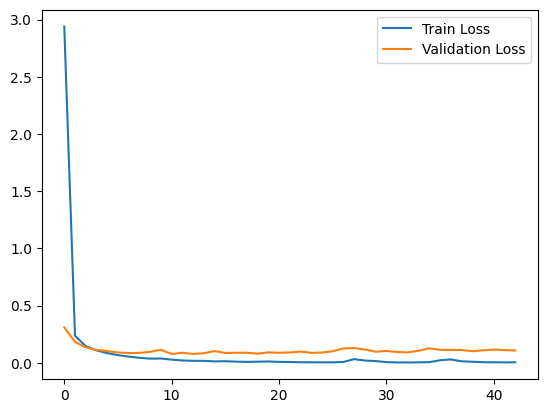

In [8]:
# Specify the GPU device(s) you want to use
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    
# Specify the GPU device(s) you want to use
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Fit the model with early stopping
history = model.fit(x.values.reshape(-1, 28, 28, 1), y_train, epochs=100, batch_size=256, validation_split=0.2, callbacks=[early_stopping])

# Optionally, plot training and validation curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
# Train the model


In [117]:
test = test.reshape(-1, 28, 28, 1)
results = model.predict(test)
results = np.argmax(results,axis =1)
results = pd.Series(results.tolist(), name="Label")

875/875 [==============================] - 5s 6ms/step


In [118]:
submission = pd.concat([pd.Series(range(1,28001),name="ImageId"),results],axis=1)
submission.to_csv("submission.csv",index=False)

In [119]:
!kaggle competitions submit -c digit-recognizer -f submission.csv -m "Message"

Successfully submitted to Digit Recognizer



  0%|          | 0.00/235k [00:00<?, ?B/s]
 41%|####      | 96.0k/235k [00:00<00:00, 894kB/s]
 95%|#########5| 224k/235k [00:00<00:00, 1.10MB/s]
100%|##########| 235k/235k [00:01<00:00, 234kB/s] 
